In [55]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import random
from sklearn.linear_model import SGDRegressor


In [56]:
df1 = pd.read_csv('./datasets/teste_08_06.csv', sep=',')
df1 = df1[['compute_version','registers','smem','cmem','num_of_cores','L2','bandwith','theoretical_flops','AppId','number_of_lines_kernel','occupancy','input_size','duration','block_x']] 
df1 = df1.select_dtypes(exclude=['object'])
df1 = df1.sort_values(by='AppId', ascending=True)
df1.head()


,compute_version,registers,smem,cmem,num_of_cores,L2,bandwith,theoretical_flops,AppId,number_of_lines_kernel,occupancy,input_size,duration,block_x
0,3.0,32,0,348,1536,0.5,192.256,3250.176,1,6,50,256,0.001242,8
1269,3.5,32,0,348,2496,1.0,208.000,3524.352,1,6,100,4096,15.894289,32
1268,3.5,32,0,348,2496,1.0,208.000,3524.352,1,6,100,3840,13.098973,32
1267,3.5,32,0,348,2496,1.0,208.000,3524.352,1,6,100,3584,10.651639,32
1266,3.5,32,0,348,2496,1.0,208.000,3524.352,1,6,100,3328,8.534204,32


In [47]:
df1.describe().round(2)

,compute_version,registers,smem,cmem,num_of_cores,L2,bandwith,theoretical_flops,AppId,number_of_lines_kernel,occupancy,input_size,duration,block_x
count,8459.00,8459.00,8459.00,8459.00,8459.00,8459.00,8459.00,8459.00,8459.00,8459.00,8459.00,8.459000e+03,8459.00,8459.00
mean,4.09,18.16,2062.23,347.74,2348.85,1.55,245.47,4339.62,5.42,18.21,84.79,5.573130e+07,1.94,189.92
std,0.89,10.27,4331.58,0.99,518.55,0.72,50.32,1060.40,2.47,13.63,26.32,8.270507e+07,7.92,328.45
min,3.00,8.00,0.00,344.00,1536.00,0.50,192.26,3250.18,1.00,5.00,13.00,2.560000e+02,0.00,8.00
25%,3.50,8.00,0.00,348.00,2048.00,1.00,208.00,3552.77,3.00,6.00,50.00,3.840000e+03,0.00,16.00
50%,3.50,13.00,0.00,348.00,2496.00,1.50,224.32,4291.20,6.00,15.00,100.00,7.424000e+03,0.02,32.00
75%,5.20,31.00,1024.00,348.00,2880.00,2.00,288.38,4980.74,8.00,40.00,100.00,1.048576e+08,0.27,256.00
max,5.20,32.00,16392.00,348.00,3072.00,3.00,336.48,6610.94,9.00,41.00,100.00,2.684355e+08,133.83,1024.00


In [42]:
np.log(0.84)

-0.1743533871447778

In [48]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

AttributeError: 'FacetGrid' object has no attribute 'set_title'

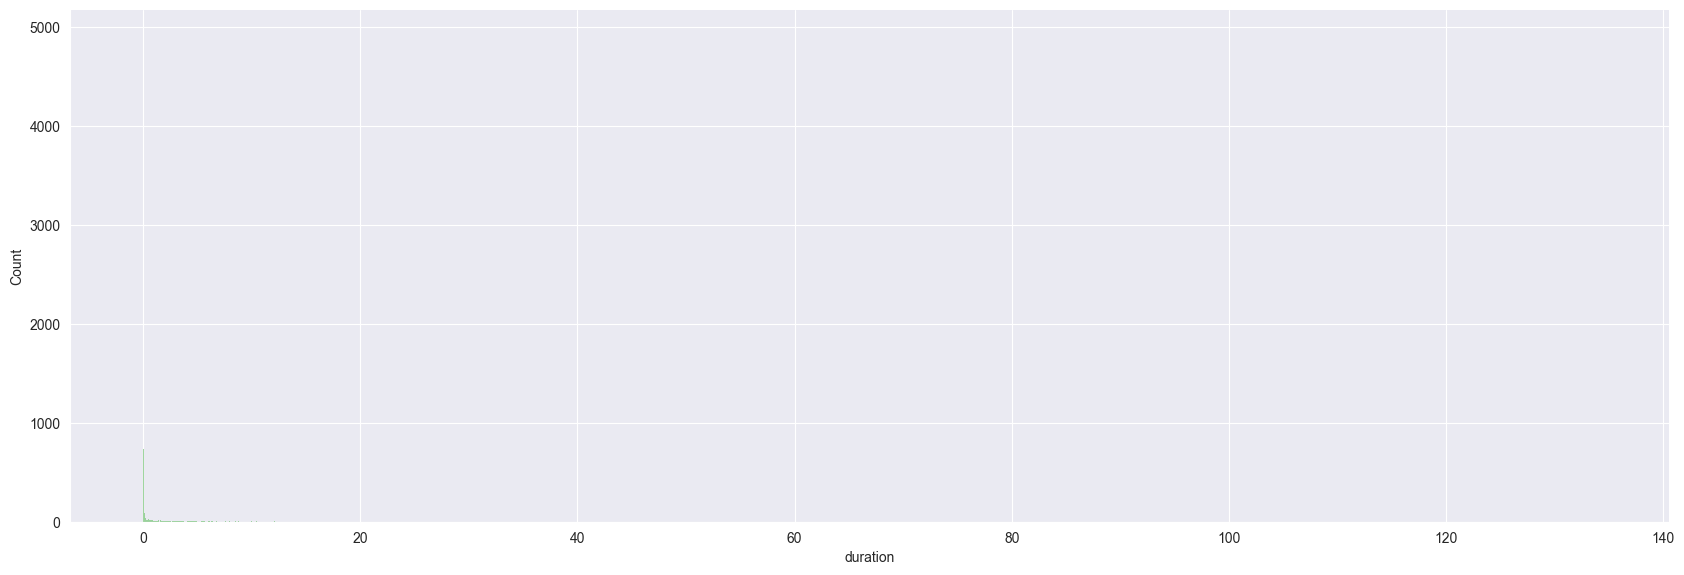

In [49]:
ax = sns.displot(df1['duration'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de frequência', fontsize=20)
ax.set_xlabel('Tempo de execução', fontsize=20)
ax

In [57]:
def calculate_mape(actual, predicted) -> float:
  
  # Convert actual and predicted
  # to numpy array data type if not already
  if not all([isinstance(actual, np.ndarray), isinstance(predicted, np.ndarray)]):
    actual, predicted = np.array(actual), np.array(predicted)

  # Calculate the MAPE value and return
  return round(np.mean(np.abs((
    actual - predicted) / actual)) * 100, 2)

In [100]:
np.log(0.000123 + 1)

0.00012299243612032702

In [107]:
print('Linear Regression')
for idApp in range(1,2):
    idApp = float(idApp)
    
    X_train = df1[df1['AppId'] != idApp]
    Y_train = df1[df1['AppId'] != idApp]['duration']
    X_test = df1[df1['AppId'] == idApp]
    Y_test = df1[df1['AppId'] == idApp]['duration']
    
    xTrain = np.log(X_train + 1)
    xTest = np.log(X_test + 1)
    yTrain = np.log(Y_train + 1)
    yTest = np.log(Y_test + 1)
    lm_model = LinearRegression()
    lm_model.fit(xTrain, yTrain)

    y_pred = lm_model.predict(xTest)
    y_pred1 =  np.log(y_pred + 1)
    print('Application: ', idApp,' ', calculate_mape(yTest, y_pred), '%')


Linear Regression


C:\Users\luanr\AppData\Local\Temp\ipykernel_1304\1784571259.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd.DataFrame(columns=['y_pred1', 'y_pred']).append(y_pred1, y_pred).to_csv('./datasets/linear_regression.csv', index=False)


TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

c:\Users\luanr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\luanr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


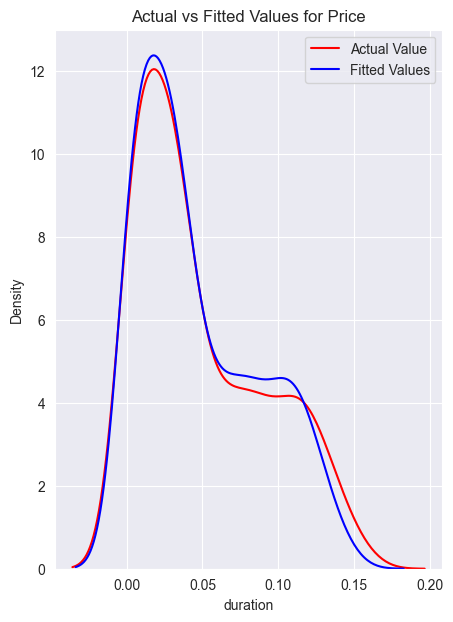

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 7))


ax = sns.distplot(yTest, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values",ax=ax)


plt.title('Actual vs Fitted Values for Price')
plt.legend()


plt.show()
plt.close()

In [11]:
# linear regression
def predict_row(row, coefficients):
	# add the bias, the last coefficient
	result = coefficients[-1]
	# add the weighted input
	for i in range(len(row)):
		result += coefficients[i] * row[i]
	return result

def predict_dataset(X, coefficients):
        yhats = list()
        for row in X:
            # make a prediction
            yhat = predict_row(row, coefficients)
            # store the prediction
            yhats.append(yhat)
        return yhats

In [14]:
print('Linear Regression')
for idApp in range(1,2):
    idApp = float(idApp)
    
    X_train = df1[df1['AppId'] != idApp]
    Y_train = df1[df1['AppId'] != idApp]['duration']
    X_test = df1[df1['AppId'] == idApp]
    Y_test = df1[df1['AppId'] == idApp]['duration']

    yTrain = np.log(Y_train + 0.01)
    yTest = np.log(Y_test + 0.01)

    X, y = make_regression(n_samples=1000, n_features=14, n_informative=2, noise=0.2, random_state=1)
    n_coeff = X_train.shape[1] + 1
    # generate random coefficients
    print(n_coeff)

Linear Regression
15
